# Optional Lab: Classification

In this lab, you will contrast regression and classification.

In [1]:
import sys, os
import numpy as np
try:
    %matplotlib widget
except:
    %matplotlib inline
    print("Colab not support matplotlib widget")
import matplotlib.pyplot as plt
from pathlib import Path


#先檢查README,有的話表示是完整檔案不用下載
def find_repo_root(marker="README.md"):
    cur = Path.cwd()
    while cur != cur.parent:  # 防止無限迴圈，到達檔案系統根目錄就停
        if (cur / marker).exists():
            return cur
        cur = cur.parent
    return None


def import_data_from_github():
    import os, urllib.request, pathlib, shutil
    
    def isRunningInColab() -> bool:
        return "google.colab" in sys.modules

    def isRunningInJupyterLab() -> bool:
        try:
            import jupyterlab
            return True
        except ImportError:
            return False
        
    def detect_env():
        from IPython import get_ipython
        if isRunningInColab():
            return "Colab"
        elif isRunningInJupyterLab():
            return "JupyterLab"
        elif "notebook" in str(type(get_ipython())).lower():
            return "Jupyter Notebook"
        else:
            return "Unknown"
        
    def get_utils_dir(env): 
        if env == "Colab": 
            if "/content" not in sys.path:
                sys.path.insert(0, "/content")
            return "/content/utils"
        else:
            return Path.cwd() / "utils"

    env = detect_env()
    UTILS_DIR = get_utils_dir(env)
    REPO_DIR = "Machine-Learning-Lab"

    shutil.rmtree(UTILS_DIR, ignore_errors=True)
    os.makedirs(UTILS_DIR, exist_ok=True)

    BASE = f"https://raw.githubusercontent.com/mz038197/{REPO_DIR}/main"
    urllib.request.urlretrieve(f"{BASE}/utils/lab_utils_common_classification.py", f"{UTILS_DIR}/lab_utils_common_classification.py")
    urllib.request.urlretrieve(f"{BASE}/utils/plt_one_addpt_onclick.py", f"{UTILS_DIR}/plt_one_addpt_onclick.py")
    urllib.request.urlretrieve(f"{BASE}/utils/deeplearning.mplstyle", f"{UTILS_DIR}/deeplearning.mplstyle")


repo_root = find_repo_root()

if repo_root is None:
    import_data_from_github()
    repo_root = Path.cwd()
    

os.chdir(repo_root)
print(f"✅ 切換工作目錄至 {Path.cwd()}")
sys.path.append(str(repo_root)) if str(repo_root) not in sys.path else None
print(f"✅ 加入到系統路徑")

from utils.lab_utils_common_classification import dlc, plot_data
from utils.plt_one_addpt_onclick import plt_one_addpt_onclick

plt.style.use('utils/deeplearning.mplstyle')
print("✅ 匯入模組及設定繪圖樣式")

✅ 切換工作目錄至 d:\Work\Python\Machine-Learning-Lab
✅ 加入到系統路徑
✅ 匯入模組及設定繪圖樣式


## Classification Problems
<img align="left" src="./images/C1_W3_Classification.png"     style=" width:380px; padding: 10px; " > Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes. 

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

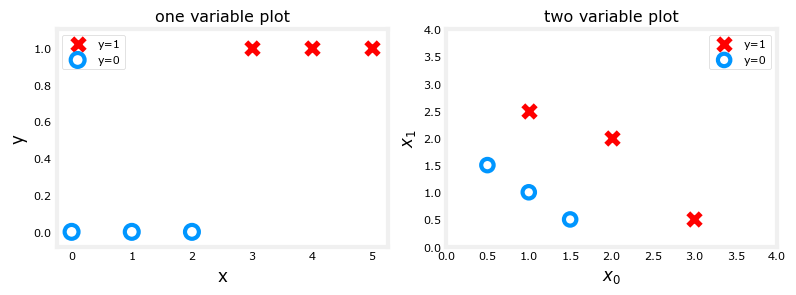

In [3]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear Regression approach
In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.  Try the following:
- Click on 'Run Linear Regression' to find the best linear regression model for the given data.
    - Note the resulting linear model does **not** match the data well. 
One option to improve the results is to apply a *threshold*. 
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good, the predictions match the data
- *Important*: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
    - Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
- to clear/renew the plot, rerun the cell containing the plot command.

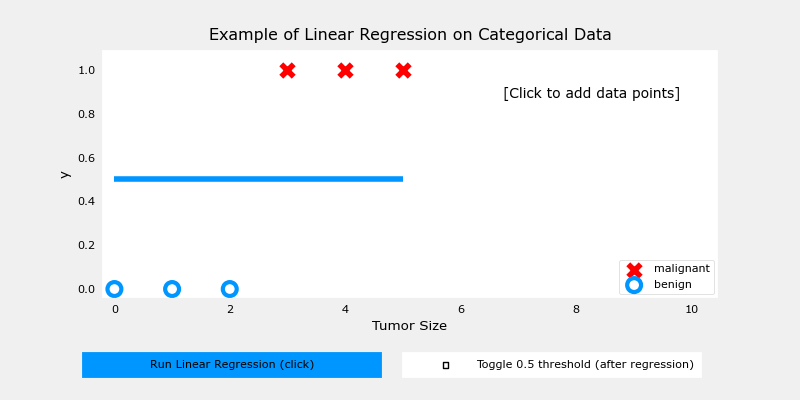

In [6]:
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

The example above demonstrates that the linear model is insufficient to model categorical data. The model can be extended as described in the following lab.

## Congratulations!
In this lab you:
- explored categorical data sets and plotting
- determined that linear regression was insufficient for a classification problem.